In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading the MNIST dataset
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
# Normalize the pixel values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [4]:
# Define the ANN Model Architecture

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),  # Convert the 28x28 Image into a 1D Array
    keras.layers.Dense(128,activation='relu'),  # Hidden Layer with 128 Units
    keras.layers.Dense(10,activation='softmax')  #Output Layer with 10 units
])

In [5]:
# Compile the Model
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [6]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2558 - accuracy: 0.9271 - val_loss: 0.1363 - val_accuracy: 0.9592
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1126 - accuracy: 0.9666 - val_loss: 0.0943 - val_accuracy: 0.9722
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0785 - accuracy: 0.9764 - val_loss: 0.0779 - val_accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0579 - accuracy: 0.9821 - val_loss: 0.0778 - val_accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0457 - accuracy: 0.9854 - val_loss: 0.0777 - val_accuracy: 0.9775


In [7]:
# Predict the Labels of the test Set
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 995us/step


In [8]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
# Print the Confusion Matrix
print('Confusion Matrix')
print(cm)

# Calculate the Accuracy
acc=accuracy_score(y_test,y_pred)

# Printing the Accuracy
print('Accuracy :',acc)

Confusion Matrix
[[ 970    0    1    1    0    2    3    2    1    0]
 [   0 1124    3    0    0    2    2    1    3    0]
 [   6    5 1002    2    1    0    3    2   11    0]
 [   0    0    4  993    0    3    0    4    5    1]
 [   2    1    4    0  960    1    6    2    1    5]
 [   2    1    0    8    1  871    3    1    3    2]
 [   5    3    0    1    1    2  944    1    1    0]
 [   0    6   11    4    0    0    0 1001    1    5]
 [   6    0    3    6    4    2    3    2  948    0]
 [   2    4    0   10   11    5    1    7    7  962]]
Accuracy : 0.9775


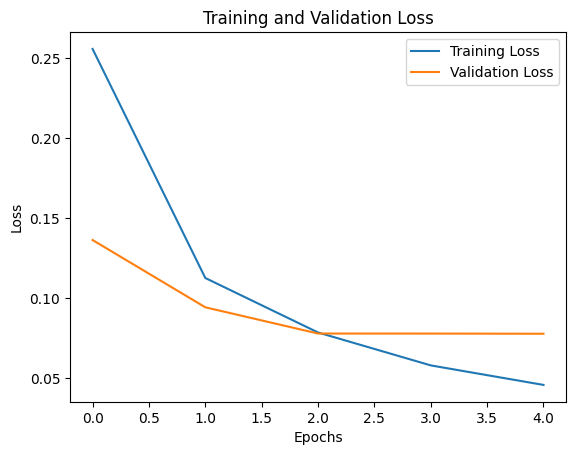

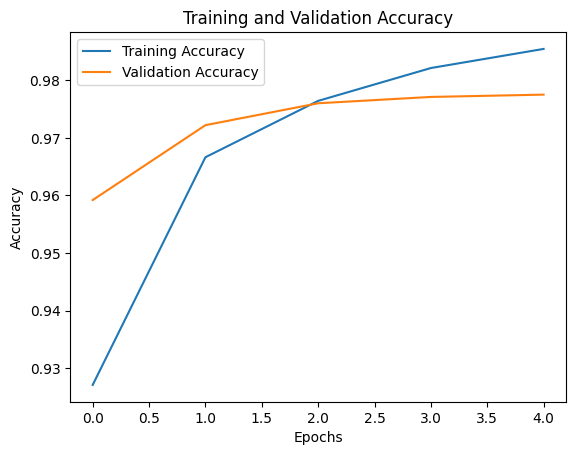

In [9]:
import matplotlib.pyplot as plt

# Plotting the Training and Validation Loss
plt.plot(history.history['loss'] , label='Training Loss')
plt.plot(history.history['val_loss'] , label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plotting the Training and Validation Loss
plt.plot(history.history['accuracy'] , label='Training Accuracy')
plt.plot(history.history['val_accuracy'] , label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()